## Partie Chaine de Markov (Part 1)
## fichier a completer par les etudiant.es
## L. Likforman

In [56]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

filename_A='bigramenglish.txt'
A=np.loadtxt(filename_A)
print(len(A))
filename_F='bigramfrancais.txt'
F=np.loadtxt(filename_F)
print(len(F))
dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' '}
print(len(dic))

28
28
28


## I.2.a 
bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.
A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre

In [57]:
mat_english=np.array([A[i][j] for i in range(len(A)) for j in range(len(A[0]))])
dic_inv = {c:s for s,c in dic.items()}
#print(dic_inv)
for j in range(1,len(A)-1):
    indice=np.argmax(A[j])+1
    #print(A[j])
    #print(indice)
    print("La transition la plus fréquente depuis la lettre " +str(dic[str(j+1)]) +" est la lettre : " + str(dic[str(indice)]))



#print(mat_english)

La transition la plus fréquente depuis la lettre a est la lettre : n
La transition la plus fréquente depuis la lettre b est la lettre : e
La transition la plus fréquente depuis la lettre c est la lettre : o
La transition la plus fréquente depuis la lettre d est la lettre :  
La transition la plus fréquente depuis la lettre e est la lettre :  
La transition la plus fréquente depuis la lettre f est la lettre :  
La transition la plus fréquente depuis la lettre g est la lettre :  
La transition la plus fréquente depuis la lettre h est la lettre : e
La transition la plus fréquente depuis la lettre i est la lettre : n
La transition la plus fréquente depuis la lettre j est la lettre : o
La transition la plus fréquente depuis la lettre k est la lettre :  
La transition la plus fréquente depuis la lettre l est la lettre : e
La transition la plus fréquente depuis la lettre m est la lettre : e
La transition la plus fréquente depuis la lettre n est la lettre :  
La transition la plus fréquente de

La première ligne correspond au vecteur des probabilité d'avoir un caractère après un espace. Par exemple le ième terme correspond à la probabilité d'avoir la $i-1$ ième lettre de l'alphabet après un espace. 
On remarque, qu'il ne peut pas y avoir qu'un espace après un autre espace. 
La première colonne correspond à la probabilité d'avoir un espace après un autre caractère, et cela vaut toujours zéro.

## I.2.b


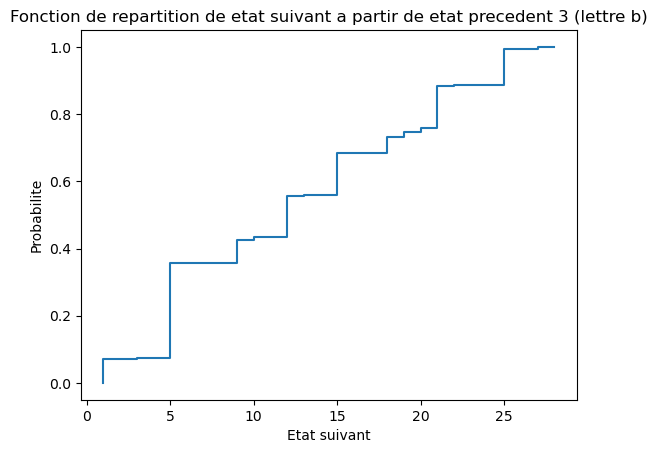

In [58]:
plt.step(range(1, 29), np.cumsum(A[2,]))
#plt.step()
plt.title('Fonction de repartition de etat suivant a partir de etat precedent 3 (lettre b)')
plt.xlabel('Etat suivant')
plt.ylabel('Probabilite') 
plt.show()

In [59]:
def etat_suivant(ligne_matrice_trans):
    '''
    La fonction génère un état (à t+1) à partir de l’état courant (à t) 
    La ligne de la matrice de transitions correspond aux probabilités 
    de transiter de l etat courant vers les autres etats.
    '''
    f_repartition = np.cumsum(ligne_matrice_trans)
    unif = np.random.random()
    stat = 0
    while(unif >= f_repartition[stat]):
        stat = stat+1
    return stat+1


In [60]:
def  generate_state_seq(A):
    
    """
    Calculate a sequence of states

    """  
    numStates = len(A)
# Generate the emitting states sequence 
    t = 0  
    stateSeq=[]
    etat=1
    while(etat!=28):
        stateSeq.append(etat)
        etat=etat_suivant(A[etat-1])
    stateSeq.append(etat)
    return stateSeq

print(generate_state_seq(A))


[1, 21, 2, 10, 15, 5, 28]


def display_seq(seq):
    str_seq = ""
    .....
    return str_seq

In [107]:
seq = generate_state_seq(A)

def display_seq(seq):
    letters = [dic[str(x)] for x in seq]
    word = ''
    for i in range(len(letters)):
        word+=letters[i]
    return word

print("Voici 20 exemples de mots générés de cette manière : ")
for _ in range(20):
    print(display_seq(generate_state_seq(A)))


Voici 20 exemples de mots générés de cette manière : 
-on+
-hine+
-lit+
-ome+
-thefre+
-balesl+
-ceerkiaks+
-wh+
-d+
-het+
-oxittinin+
-alde+
-o+
-asur+
-angsthore+
-se+
-d+
-eittharcoman+
-edilitho+
-the+


In [72]:
print(display_seq(seq))
print(np.sum(A[2]))

 an 
1.000000004593


# I.2.c

In [77]:
def modifie_mat_dic(A,dic) :
    dic['29']='.'
    A_mod=np.zeros((29,29))
    for i in range(len(A)):
        for j in range(len(A)):
            A_mod[i][j]=A[i][j]
    A_mod[27][28]=0.1
    A_mod[27][0]=0.9
    A_mod[27][27]=0.0
    A_mod[28][28]=1.0
    return A_mod,dic

In [78]:
Amod,dicmod=modifie_mat_dic(A,dic)

In [79]:
def genere_phrase(A,dic) :
    numStates=len(dic)
    stateSeq=[]
    # stateSeq est une liste
    stateSeq.append(1)  # on commence par etat 1
    etat=1
    while(etat!=numStates):
        stateSeq.append(etat)
        etat=etat_suivant(A[etat-1])
    stateSeq.append(etat)
    return stateSeq

In [80]:
print('generation de phrases  :')
for i in range (5) :
    state_seq=genere_phrase(Amod,dicmod)
    #print(state_seq)
    
    print(display_seq(state_seq))


generation de phrases  :
  p  bof  t  wi  he  ore  go  il  sicint  ty  n  s  sfo  ris  bens  l  siglousuathelle  herathes  pre  t  s .
  iof  sth  oss  d .
  llert  a  tupllill  weind .
  atise  ids  th .
  soinenindes  by  aiventesulley  e  e  cho  wibo  y  prss  ry  by .


## I.3


In [82]:
#transformer les espaces en +/- dans le dictionnaire et inversion
dicmod['1']='-'
dicmod['28']='+'
dicmod['29']='.'

In [108]:
def calc_vraisemblance(string, dic, mat) : 
    dicInv = {v: k for k, v in dic.items()} 
    vraisemblance = 1.0
    state = dicInv[string[0]]
    seq=[dicInv[x] for x in string]
    for i in range(1,len(seq)):
        #print(mat[int(state)-1][int(seq[i])-1] )
        vraisemblance*=mat[int(state)-1][int(seq[i])-1]  
        state = seq[i] 
    print("Pour le texte " + string + ", la vraisemeblance est de " + str(vraisemblance))
    return vraisemblance

print(calc_vraisemblance('-the+',dicmod,Amod))

Pour le texte -the+, la vraisemeblance est de 0.009453926469318025
0.009453926469318025


In [105]:
Fmod=modifie_mat_dic(F,dic)[0]
sentence = "-to+-be+-or+-not+-to+-be+."
sentence2= "-etre+-ou+-ne+-pas+-etre+."
print("Pour le dictionnaire anglais : ")

calc_vraisemblance(sentence,dicmod,Amod)
calc_vraisemblance(sentence2,dicmod,Amod)

print("Pour le dictionnaire français : ")

calc_vraisemblance(sentence,dicmod,Fmod)
calc_vraisemblance(sentence2,dicmod,Fmod)

Pour le dictionnaire anglais : 
Pour le mot -to+-be+-or+-not+-to+-be+., la vraisemeblance est de 8.112892227809415e-20
Pour le mot -etre+-ou+-ne+-pas+-etre+., la vraisemeblance est de 4.462288711775253e-24
Pour le dictionnaire français : 
Pour le mot -to+-be+-or+-not+-to+-be+., la vraisemeblance est de 5.9602081018686406e-30
Pour le mot -etre+-ou+-ne+-pas+-etre+., la vraisemeblance est de 1.145706887234789e-19


1.145706887234789e-19